# **CB0494: Introduction to Data Science and Artificial Intelligence Mini Project**

**Group Member:**
1. Keanu Ocvian Budiman (U2320203B)
2. Lwa Hong Long (U2321125H)
---

## **A. Problem Introduction**
- **Title:**   
Airbnb Recommendation System in Milan
- **Objective:**   
In 
- **Motivation:**   

- **Research Questions:**   
1. 


## **B. Data Preparation**

### *1. Explore the dataset*

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load the dataset
housingData = pd.read_csv('data.csv')
housingData.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6400,The Studio Milan,13822,Francesca,TIBALDI,45.44119,9.17813,Private room,100,4,12,19/04/10,0.14,1,358
1,23986,""" Characteristic Milanese flat""",95941,Jeremy,NAVIGLI,45.44806,9.17373,Entire home/apt,150,1,15,07/09/20,0.21,1,363
2,28300,nice flat near the park,121663,Marta,SARPI,45.47647,9.17359,Private room,180,1,8,22/04/12,0.11,1,365
3,32119,Nico & Cynthia's Easy Yellow Suite,138683,Nico&Cinzia,VIALE MONZA,45.52014,9.22300,Entire home/apt,75,2,15,01/07/18,0.23,3,200
4,32649,Nico&Cinzia's Red Easy Suite!,138683,Nico&Cinzia,VIALE MONZA,45.51874,9.22495,Entire home/apt,71,2,29,23/10/16,0.71,3,308
5,37256,COZY FULLY FURNISHED PRIVATE STUDIO CITY CENTER,119002,Giancarlo,BUENOS AIRES - VENEZIA,45.46884,9.20777,Private room,55,2,34,13/05/19,0.49,2,0
6,40470,Giacinto Cosy & clean flat near MM1,174203,Giacinto,VIALE MONZA,45.52023,9.22747,Entire home/apt,75,3,37,24/07/17,0.33,2,350
7,42732,"Navigli near down town, linked Expo",186608,Francesco,MAGENTA - S. VITTORE,45.45814,9.17654,Entire home/apt,199,2,14,22/04/18,0.20,2,362
8,46536,Nico & Cinzia's Pink Suite!,138683,Nico&Cinzia,VIALE MONZA,45.52276,9.22478,Entire home/apt,76,2,27,03/07/18,0.23,3,150
9,55055,BEAUTIFUL MODERN ATTIC CENTER OF MI,246217,Cristina,BUENOS AIRES - VENEZIA,45.48096,9.21686,Entire home/apt,145,3,2,16/04/16,0.03,1,365


In [4]:
print (f"Dataset Shape (rows x columns): {housingData.shape}")
print (f"Dataset Info: {housingData.info()}")

Dataset Shape (rows x columns): (18322, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18322 entries, 0 to 18321
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18322 non-null  int64  
 1   name                            18312 non-null  object 
 2   host_id                         18322 non-null  int64  
 3   host_name                       18198 non-null  object 
 4   neighbourhood                   18322 non-null  object 
 5   latitude                        18322 non-null  float64
 6   longitude                       18322 non-null  float64
 7   room_type                       18322 non-null  object 
 8   price                           18322 non-null  int64  
 9   minimum_nights                  18322 non-null  int64  
 10  number_of_reviews               18322 non-null  int64  
 11  last_review                     13260 non-null  o

In [5]:
# Drop the unnecessary data (id, name, host_id, host_name, last_review, and reviews_per_month)
housingData.drop(columns=["id", "name", "host_id", "host_name", "last_review", "reviews_per_month"], inplace=True)
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18322 entries, 0 to 18321
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   18322 non-null  object 
 1   latitude                        18322 non-null  float64
 2   longitude                       18322 non-null  float64
 3   room_type                       18322 non-null  object 
 4   price                           18322 non-null  int64  
 5   minimum_nights                  18322 non-null  int64  
 6   number_of_reviews               18322 non-null  int64  
 7   calculated_host_listings_count  18322 non-null  int64  
 8   availability_365                18322 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.3+ MB


In [6]:
# List of columns to check for unique values
columns_to_check = [
    'neighbourhood', 'latitude', 'longitude', 'room_type',
    'price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365'
]

# Loop through the columns and print unique value counts
for col in columns_to_check:
    unique_count = housingData[col].nunique()
    print(f"Unique values in {col}: {unique_count}")


Unique values in neighbourhood: 87
Unique values in latitude: 7419
Unique values in longitude: 9134
Unique values in room_type: 4
Unique values in price: 465
Unique values in minimum_nights: 68
Unique values in number_of_reviews: 421
Unique values in calculated_host_listings_count: 49
Unique values in availability_365: 366


In [7]:
# Check for unique values in 'room_type'
print (f"Room type: {housingData['room_type'].unique()}")

Room type: ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [8]:
# Show the final DataFrame
housingData.sample(20)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
12636,NAVIGLI,45.45132,9.17779,Entire home/apt,70,1,2,3,10
6504,WASHINGTON,45.46233,9.15987,Entire home/apt,60,4,24,1,360
13481,CENTRALE,45.48782,9.20120,Entire home/apt,58,1,12,1,245
5765,TORTONA,45.45315,9.16696,Entire home/apt,63,3,82,1,14
9794,GUASTALLA,45.45514,9.20163,Private room,70,2,10,1,0
6008,BUENOS AIRES - VENEZIA,45.47090,9.21388,Entire home/apt,170,2,3,1,0
7254,DUOMO,45.46413,9.18119,Entire home/apt,10,1,0,161,0
5520,GHISOLFA,45.48834,9.15620,Entire home/apt,50,7,37,1,89
10677,BAGGIO,45.46786,9.09412,Entire home/apt,37,3,6,2,177
17238,TICINESE,45.44420,9.18109,Entire home/apt,80,1,0,4,364


### *2. Exploratory Data Analysis (EDA)*

In [9]:
def get_outliers(data, column):
    first_quartile = data[column].quantile(0.25)
    median = data[column].median()
    third_quartile = data[column].quantile(0.75)
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - 1.5 * iqr
    upper_bound = third_quartile + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print (f"Lower bound: {lower_bound}")
    print (f"Median: {median}")
    print (f"Upper bound: {upper_bound}")
    print(f"Number of outliers in {column}: {outliers.shape[0]}")

**a. Distribution Analysis**

<Axes: title={'center': 'Price Distribution'}, xlabel='Price'>

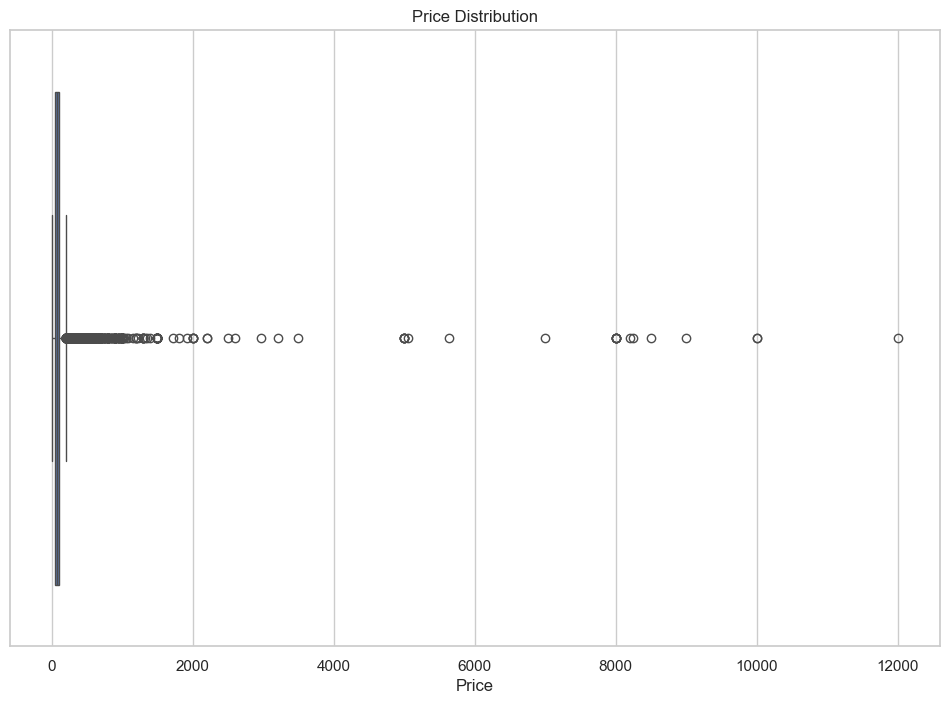

In [10]:
# Find the price distribution
sb.set_style('whitegrid')

plt.figure(figsize=(12, 8))
plt.title('Price Distribution')
plt.xlabel('Price')
sb.boxplot(data=housingData["price"], orient='h')

In [11]:
# Check for outliers in the 'price' column
get_outliers(housingData, "price")
print(f"Number of price that below zero: {housingData[housingData['price'] < 0].shape[0]}")



Lower bound: -40.0
Median: 73.5
Upper bound: 200.0
Number of outliers in price: 1595
Number of price that below zero: 0


> Based on the price distribution, we can conclude that the dataset contain a quite high variace in price distribution as can be seen from the amount of outliers. However, we decide to not remove it since it can be the "true outliers". According to the internet, we can found any kind of airbnb with many variance in price depending on the size and location. Therefore, it is make sense if we keep the data that higher than the upper bound.

<Axes: title={'center': 'Number of Reviews Distribution'}, xlabel='Number of Reviews'>

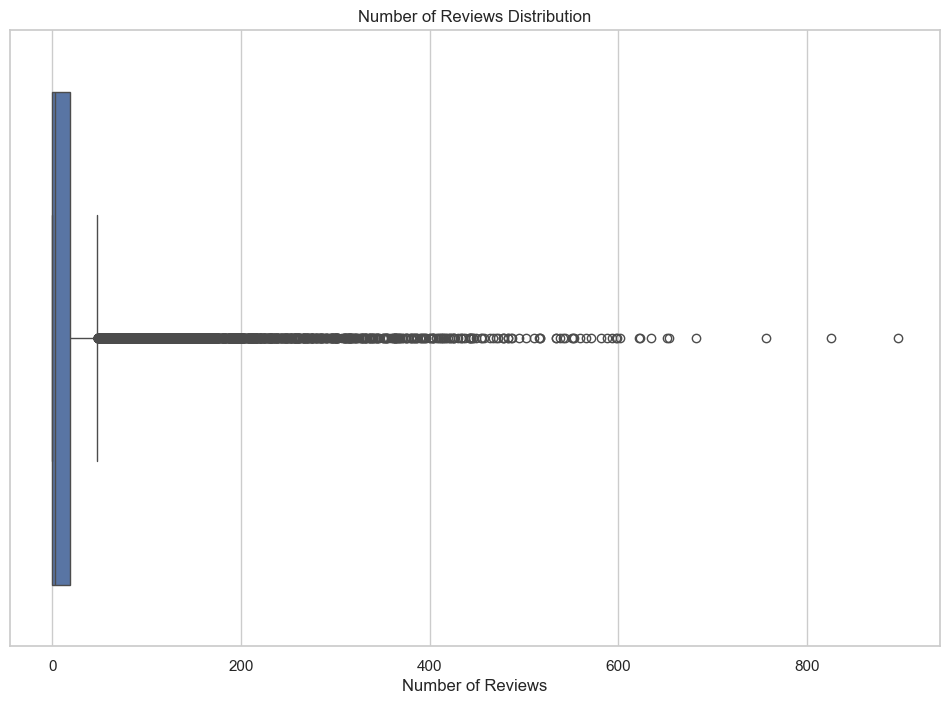

In [12]:
# Find the numvber of review distribution
sb.set_style('whitegrid')

plt.figure(figsize=(12, 8))
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
sb.boxplot(data=housingData["number_of_reviews"], orient='h')

In [13]:
get_outliers(housingData, "number_of_reviews")
print(f"Number of reviews that below zero: {housingData[housingData['number_of_reviews'] < 0].shape[0]}")

Lower bound: -28.5
Median: 3.0
Upper bound: 47.5
Number of outliers in number_of_reviews: 2403
Number of reviews that below zero: 0


> With the same reason as before, the variation on number of reviews may happen depending on the amount of customer who are willing to fill the review. Intuitively, airbnb that have more customers will have more number of reviews. That's why, we won't remove the outliers.

<Axes: title={'center': 'Minimum Nights Distribution'}, xlabel='Minimum Nights'>

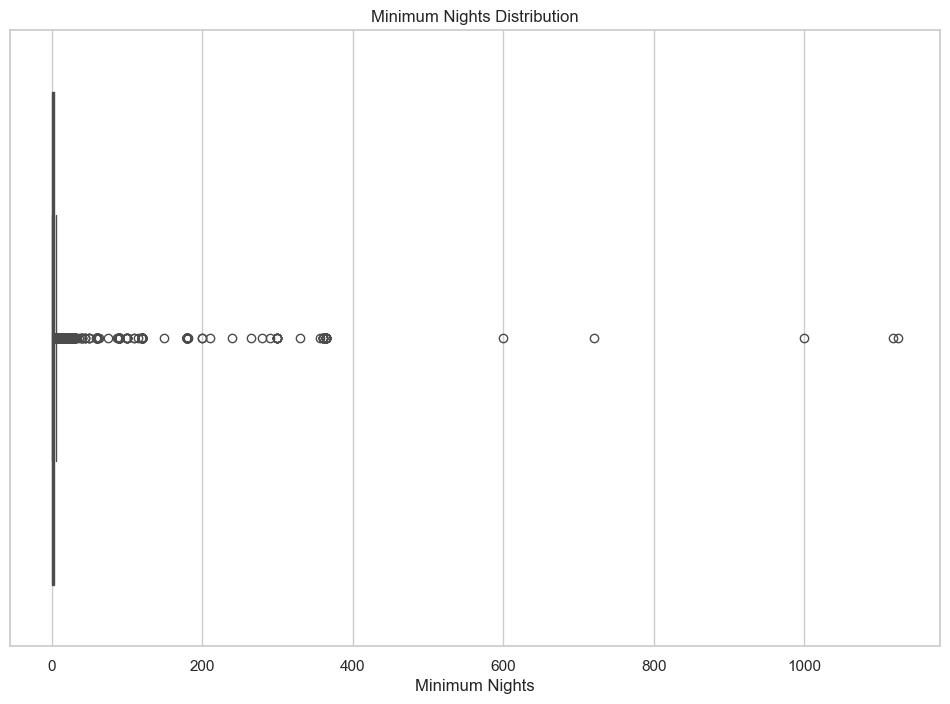

In [14]:
# Find the minimum nights distribution
sb.set_style('whitegrid')

plt.figure(figsize=(12, 8))
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
sb.boxplot(data=housingData["minimum_nights"], orient='h')

In [15]:
get_outliers(housingData, "minimum_nights")
print(f"Number of minimum nights that below zero: {housingData[housingData['minimum_nights'] < 0].shape[0]}")

Lower bound: -2.0
Median: 2.0
Upper bound: 6.0
Number of outliers in minimum_nights: 1876
Number of minimum nights that below zero: 0


In [16]:
# Remove outliers from the dataset
housingData  = housingData[housingData["minimum_nights"] < 7]

> For the minimum night, we decide to remove the outliers since it is quite rare to find an airbnb that demand the customer to stay for more than one week. This decision is taken after we did research on several airbnb platform that provide rent in Milan. 

**b. Geographic Analysis**

In [18]:
! pip install folium
import folium

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ModuleNotFoundError: No module named 'folium'

In [17]:
from matplotlib.colors import LinearSegmentedColormap
import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

ModuleNotFoundError: No module named 'folium'